# K-Nearest Neighbour (KNN) Algorithm from Scratch
## Multivariate Regression

#### Author: Markus Ullenbruch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. The Algorithm

In [2]:
class KNNRegression:
    def __init__(self, k):
        self.k = k
        self.data = None
        
    def fit(self, X, y):
        self.data = X
        self.label = y
    
    def predict(self, newdata):
        pred = []
        for sample in newdata:
            
            # calculate distances and save distance and corresponding label
            distance_label = []
            for sample_train, label in zip(self.data, self.label):
                d = np.linalg.norm(sample - sample_train)
                distance_label.append((d, label))
            
            # sortieren nach distance ascending
            distance_label.sort(key=lambda tup: tup[0])
            
            # Pick k nearest neighbours
            distance_label = distance_label[0:self.k]
            n = 0
            target = np.zeros_like(self.label[0])
            for _, label in distance_label:
                target += label
                n += 1
            target = target/n
            pred.append(target)
        return np.vstack(pred)
    

<img src="PseudoCode.jpg" alt="Drawing" style="width: 700px;"/>

## 2. Test Univariate Regression Data

In [3]:
num_points = 400
X = np.linspace(0, 10, num=num_points).reshape(num_points,1)
y = np.linspace(0, 10, num=num_points).reshape(num_points,1)
y = y + np.random.normal(size=y.shape)

In [4]:
# Make Predictions
testpunkt = np.array([[0], [2], [4], [6], [8], [10]])

knn = KNNRegression(k=3)
knn.fit(X, y)
preds = knn.predict(testpunkt)

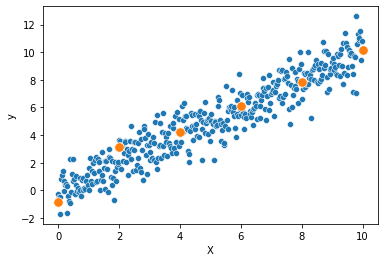

In [5]:
data = pd.DataFrame({'X': list(np.squeeze(X)), 'y': list(np.squeeze(y))})
predictions = pd.DataFrame({'X': list(np.squeeze(testpunkt)), 'y': list(np.squeeze(preds))})

sns.scatterplot(data=data, x='X', y='y')
sns.scatterplot(data=predictions, x='X', y='y', s=90)
plt.show()

## 3. Test Multivariate Regression Data

In [6]:
x1, x2 = [], []

for i in range(-5,5):
    for j in range(-5, 5):
        x1.append(i)
        x2.append(j)
y = []    
for i in range(len(x1)):
    yy = x1[i]**2 + x2[i]**2 + np.random.normal(0, 0.1)
    y.append(yy)
    
X = np.array([x1, x2]).transpose()
Y = np.array([y]).transpose()


testpunkt = np.array([ [0, 0], [-5, -5], [5,5], [-5, 5], [5,-5], [3, -3], [-3, -3], [0, 5] ])
print(testpunkt.shape)

knn = KNNRegression(k=3)
knn.fit(X, Y)
preds = knn.predict(testpunkt)
print(preds)

(8, 2)
[[ 0.64451785]
 [43.99338019]
 [27.37165965]
 [35.66340789]
 [35.72093015]
 [18.60776472]
 [22.61296882]
 [16.68081287]]


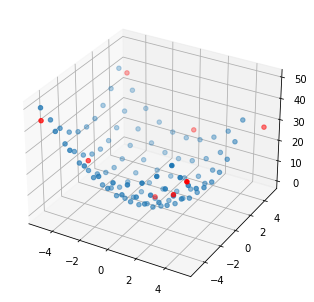

In [7]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x1, x2, y)
ax.scatter(testpunkt[:,0], testpunkt[:,1], preds[:], c='r')
pyplot.show()